## Bootstrap

Bootstrapping is a statistical method used to resample a dataset with replacement to estimate its population statistics (such as mean, median, standard deviation, etc.) In machine learning applications, bootstrap bagging is an ensemble technique used in algorithms as AdaBoost, random forests, XGBoost, and more. This technique usually leads to less overfitting and improvement of the stability of the models. Bootstrap methods draw small samples (with replacement) from a large dataset one at a time, and organizing them to construct a new dataset. In this notebook, we examine three bootstrap methods. Row, pair, and block bootstrap.

In [1]:
# Import packages
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Import MlFinLab tools
from mlfinlab.data_generation.bootstrap import row_bootstrap, pair_bootstrap, block_bootstrap

# Setting a seed
np.random.seed(2814)

MLFINLAB_API_KEY is valid.


In [2]:
# Tickers to to use
ASSETS = ["AAPL", "MSFT", "AMZN", "META", "GOOG",
          "GLD", "SLV", "SPLV", "TLT", "SHY",
          "EWZ", "EWI", "EWJ", "EWG", "EWW"]

# Download and calculate returns of assets
returns = yf.download(tickers=" ".join(ASSETS), period='1y')['Close'].pct_change().dropna() * 100

[*********************100%***********************]  15 of 15 completed


### Row Bootstrap
The row bootstrap method samples rows with replacement from a dataset to generate a new dataset. For example, for a dataset of size
$T \times n$ which symbolizes $T$ rows (timesteps) and $n$ columns (assets), if we use the row bootstrap method to generate
a new matrix of the same size, we sample with replacement $T$ rows to form the new dataset. This implies that the new dataset can contain
repeated data from the original dataset.

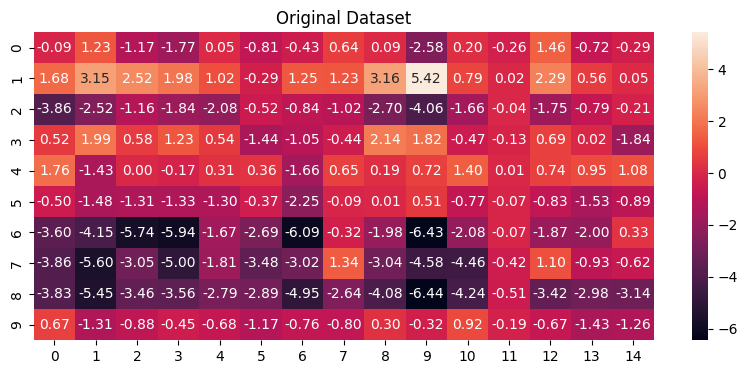

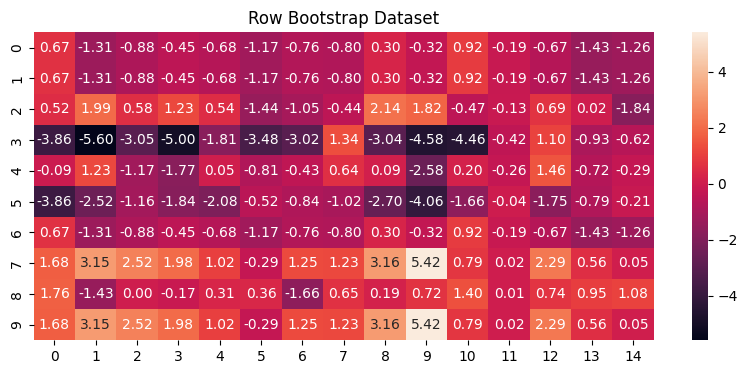

In [3]:
# Generate a row bootstrap matrix
T = 10
bootstrap_dataset = row_bootstrap(returns.iloc[:T], n_samples=1)

# Plot them
plt.figure(figsize=(10, 4))
sns.heatmap(returns.iloc[:T].values, annot=True, fmt=".2f")
plt.title("Original Dataset")

plt.figure(figsize=(10, 4))
sns.heatmap(bootstrap_dataset[0], annot=True, fmt=".2f")
plt.title("Row Bootstrap Dataset")
plt.show()

We can appreciate how the row bootstrap dataset composed of:
- Rows 0, 1, 6 are row 9 in original dataset
- Row 2 is row 3 in original dataset
- Row 3 is row 7 in original dataset
- Row 4 is row 0 in original dataset
- Row 5 is row 2 in original dataset
- Rows 7, 9 are row 1 in original dataset
- Row 8 is row 4 in original dataset

### Pair Bootstrap

The pair bootstrap method samples pairs of columns with replacement from a dataset to generate a new dataset. This new dataset can be used to generate a dependence
matrix, as is a correlation matrix. For example, for a dataset of size $T \times n$ which symbolizes $T$ rows (timesteps) and $n$ columns (assets),
if we use the pair bootstrap method to generate a correlation matrix of size $n \times n$, we iterate over the upper triangular indices of the correlation
matrix. For each index, we sample with replacement 2 columns and all their rows. We calculate the correlation measure of this pair and use it to fill the given
index of the correlation matrix. We repeat this process until we fill the correlation matrix.

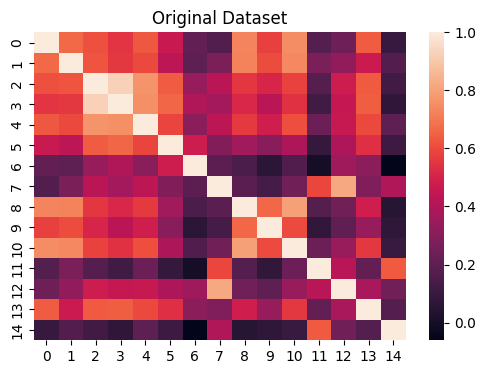

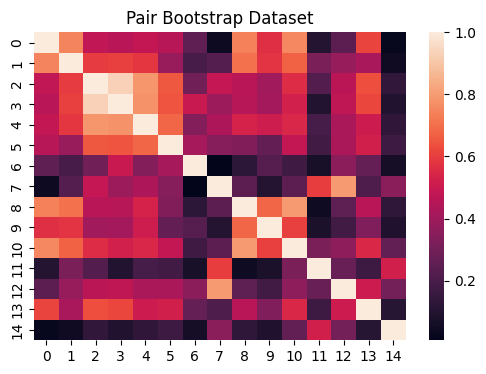

In [4]:
# Create random matrix
# T = 50
# Generate a pair bootstrap correlation matrix
bootstrap_corr_matrix = pair_bootstrap(returns, n_samples=1)

# Plot them
plt.figure(figsize=(6, 4))
sns.heatmap(returns.corr().values)
plt.title("Original Dataset")

plt.figure(figsize=(6, 4))
sns.heatmap(bootstrap_corr_matrix[0])
plt.title("Pair Bootstrap Dataset")
plt.show()

We can observe that the bootstrapped correlation matrix retains the same structure of the original correlation matrix, but their correlation value differ.

### Block Bootstrap

The block bootstrap method samples blocks of data with replacement from a dataset to generate a new dataset. The block size can be of a size equal to or less
than the original dataset. The blocks in this module are non-overlapping (except on the edges of the dataset if the blocks cannot perfectly split the data).
Their ideal size depends on the data and its application. For example, for a dataset of size $T \times n$ which symbolizes
$T$ rows (timesteps) and $n$ columns (assets), if we use the block bootstrap method to split the data set into blocks of $2 \times 2$, then
we sample as many blocks as needed to fill the bootstrapped matrix.

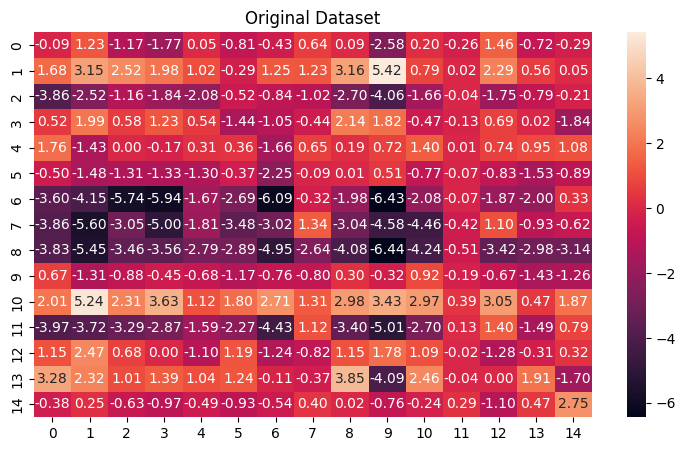

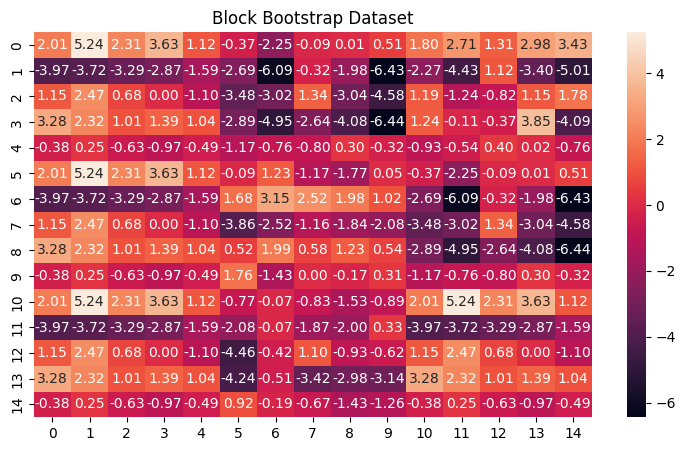

In [5]:
# Generate a block bootstrap matrix
T = 15
bootstrap_dataset = block_bootstrap(returns.iloc[:T], n_samples=1, block_size=(5, 5))

# Plot them.
plt.figure(figsize=(9, 5))
sns.heatmap(returns.iloc[:T].values, annot=True, fmt=".2f")
plt.title("Original Dataset")

plt.figure(figsize=(9, 5))
sns.heatmap(bootstrap_dataset[0], annot=True, fmt=".2f")
plt.title("Block Bootstrap Dataset")
plt.show()

Since the block size is $5 \times 5$ we can divide the original dataset into 9 blocks. 
- 0-4 rows and 0-4 columns are block 1
- 0-4 rows and 5-9 columns are block 2
- 0-4 rows and 10-14 columns are block 3
- 5-9 rows and 0-4 columns are block 4
- 5-9 rows and 5-9 columns are block 5
- 5-9 rows and 10-14 columns are block 6
- 10-14 rows and 0-4 columns are block 7
- 10-14 rows and 5-9 columns are block 8
- 10-14 rows and 10-14 columns are block 9

Using these blocks, we can appreciate the block bootstrap matrix is composed of the following blocks (in the same row-column order as described above)
- Block 2
- Block 9
- Block 7
- Block 5
- Block 4
- Block 5
- Block 4
- Block 4
- Block 6

## Conclusion

In this notebook, we showed how to generate matrices using the row and block bootstrap methods, and how to generate a correlation matrix from a returns matrix using the pair bootstrap method in the mlfinlab package.
We found that:

1. We can generate a bootstrapped matrix from an original matrix using the row bootstrap method. Each row in the bootstrapped matrix is sampled with replacement from the original one.
2. We can generate a bootstrapped matrix from an original matrix using the block bootstrap method. We divide the original matrix into blocks, and we sample them with replacement to generate the bootstrapped matrix.
3. We can generate a bootstrapped correlation matrix from an original matrix using the pair bootstrap method. We sample pairs of columns with replacement, calculate their correlation value, and use it to populate the bootstrapped correlation matrix.

[references]: #references
## References
1. [Musciotto, F., Marotta, L., Miccichè, S. and Mantegna, R.N., 2018. Bootstrap validation of links of a minimum spanning tree. Physica A: Statistical Mechanics and its Applications, 512, pp.1032-1043.](https://arxiv.org/pdf/1802.03395.pdf)